<a href="https://colab.research.google.com/github/arashash/deep_exercises/blob/main/Ch2_Exam2_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import torch

# Chapter 2 - Linear Algebra

## 2.7 Eigendecomposition

### Q1 [30 points, S]
Using [Gershgorin Circle Theorem](https://en.wikipedia.org/wiki/Gershgorin_circle_theorem), give the bounds of the eigenvalues of matrix $A$,
$$
\begin{split}\mathbf{A} = \begin{bmatrix}
1.0 & 0.1 & 0.1 & 0.1 \\
0.1 & 3.0 & 0.2 & 0.3 \\
0.1 & 0.2 & 5.0 & 0.5 \\
0.1 & 0.3 & 0.5 & 9.0
\end{bmatrix}\end{split}
$$

Also explain, for any matrix $A$, under what condition the bounds are tight and can give good approximations for the eigenvalues?

## Q2 [20 M, 20 H]
Consider a deep (large N) feedforward network without activations consisting of same square matrices with dimenion $k\times k$,
$$
\mathbf{v}_{out} = \mathbf{A}\cdot \mathbf{A}\cdots \mathbf{A} \mathbf{v}_{in} = \mathbf{A}^N \mathbf{v}_{in}
$$
Using the widget below, determine how does the dimension of matrix and standard deviation of the random Gaussian initialization is related with when the output blows up?

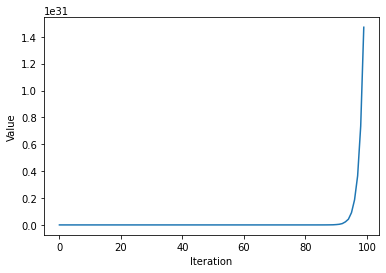

In [12]:
#@markdown Execute this cell to simulate the question for different dimensions
@widgets.interact
def plot_iterated_mapping(k=(0, 100, 1), std=(0, 1, 0.01)):
  A = std*torch.randn(k, k, dtype=torch.float64)
  v_in = torch.randn(k, 1, dtype=torch.float64)

  # Calculate the sequence of norms after repeatedly applying `A`
  norm_list = [torch.norm(v_in).item()]
  for i in range(1, 100):
      v_in = A @ v_in
      norm_list.append(torch.norm(v_in).item())

  plt.ylabel('Value')
  plt.xlabel('Iteration')
  plt.plot(torch.arange(0, 100), norm_list)

Now using the same setup, write a function that estimates the average largest eigenvalue of A given the STD of the initialization and dimenion $k$. Then using your function and fixing STD, try many $k$ values and plot the estimated average largest eigenvalue vs $\sqrt{k}$. Then using the jupyter interactive widget, plot it for different STD values. What relation do you observe between these three variables?

## 2.8 Singular Value Decomposition

## Q3 [20 M, 10 H]

Programmatically dowload [this](https://www.researchgate.net/publication/287137183/figure/fig6/AS:320151548383251@1453341485831/SR-result-for-lena-64-64-upscale-to-256-256.png) picture and convert it to $512\times 512$ grayscale and uint8 datatype and load it to a 2-D *Numpy* array and properly display it using *plt.imshow*. Then calculate the SVD of image and choose the top k singular values and set the rest equal to zero and display the image using the interactive Jupyter widget for different possible values of k. At which value of k do you start to see significant drop in image quality? How many Bytes does it take to store the original array? How many Bytes does it take to store the decomposed arrays when using only the top k singular values? Calculate the compression ratio for your selected ideal $k$ value. Save the array as JPEG and check the file size. whats the approximate JPEG compression rate?